# Classifying Hepatitis C

In this project, we will predict if a patient has hepatitis C using Machine Learning models based on relevant features provided. The [dataset](https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset) contains 615 observations and 14 attributes of blood donors' biomarkers and Hepatitis C patients laboratory and demographic values.

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('HepatitisCdata.csv')

## Data Exploration and Data Cleaning

In [3]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
df.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In the dataset, we have several variables:

```
Unnamed: 0 - Unique Identifier
Category - Type of the Patient
Age - Patient's age
Sex - Patient's sex
ALB - Albumin Blood Test
ALP - Alkaline phosphatase
ALT - Alanin Transaminase
AST - Aspartate Transaminase
BIL - Bilirubin
CHE - Acetylcholinesterase
CHOL - Cholesterol
CREA - Creatinine
GGT - Gamma-Glutamyl Transferase
PROT - Proteins
```

In [5]:
df['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,615.0,308.000000,177.679487,1.00,154.500,308.00,461.500,615.00
Age,615.0,47.408130,10.055105,19.00,39.000,47.00,54.000,77.00
ALB,614.0,41.620195,5.780629,14.90,38.800,41.95,45.200,82.20
ALP,597.0,68.283920,26.028315,11.30,52.500,66.20,80.100,416.60
ALT,614.0,28.450814,25.469689,0.90,16.400,23.00,33.075,325.30
AST,615.0,34.786341,33.090690,10.60,21.600,25.90,32.900,324.00
BIL,615.0,11.396748,19.673150,0.80,5.300,7.30,11.200,254.00
CHE,615.0,8.196634,2.205657,1.42,6.935,8.26,9.590,16.41
CHOL,605.0,5.368099,1.132728,1.43,4.610,5.30,6.060,9.67
CREA,615.0,81.287805,49.756166,8.00,67.000,77.00,88.000,1079.10


At first glance, we have a dataset of:

* Patients of age 19 - 77,
* Good range of numerical values of biomarkers
* Labels of 5 categories: 🤔
    * `0=Blood Count`
    * `0s=suspect Blood Donor`
    * `1=Hepatitis` 
    * `2=Fibrosis` 
    * `3=Cirrhosis`
* Also there are missing values on several columns 🔎

In [7]:
df.isna().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [8]:
df['Category'].value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

🤔 Seeing that `0s=Blood Suspect Donor` (in this count: `1`) has way less data compared to others, we can't rely much on it to make classification to the patients. We can drop it, or we can just unite it with `0=Blood Donor` instead.

Also, the data seems skewed with 500 values labeled as `0` while `21` to `30` values are labeled `[1, 2, 3]`. Since we're dealing with data in healthcare areas, the dataset often happens to be imbalanced. Despite that, we still need a good representation of data for the machine learning to classify the patients accurately. 

One way to do that is to gather all `Category` of `Hepatitis` (`1-3`) and label it to `1`, making it a binary classification--also a more convenient one to deal with.

In [9]:
df['Category'] = df['Category'].map({
    '0=Blood Donor': 0, '0s=suspect Blood Donor': 0, 
    '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1
})

In [10]:
df['Category'].value_counts()

Category
0    540
1     75
Name: count, dtype: int64

In [11]:
df.sample(10)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
491,492,0,56,f,39.7,66.0,14.2,20.8,3.5,7.48,5.88,66.0,7.2,67.2
479,480,0,53,f,38.0,84.7,23.5,19.8,10.8,7.30,4.82,62.0,11.4,68.5
572,573,1,54,m,41.0,41.8,41.5,187.9,21.0,8.59,5.85,91.0,104.9,79.1
483,484,0,54,f,26.2,72.9,28.5,28.8,5.5,7.49,4.91,58.0,27.6,57.0
235,236,0,53,m,49.2,71.8,42.8,29.4,6.8,15.10,6.24,107.0,48.3,77.8
71,72,0,38,m,39.9,62.9,71.7,43.9,10.4,10.90,7.01,99.0,88.3,73.1
377,378,0,42,f,43.4,54.0,11.3,21.3,1.8,6.43,4.43,54.0,18.6,82.3
514,515,0,60,f,40.5,86.0,26.0,27.6,5.7,8.60,4.90,58.0,20.1,71.7
405,406,0,45,f,59.8,59.8,13.2,17.4,6.9,5.62,6.42,70.0,12.3,66.6
445,446,0,49,f,43.3,71.5,28.4,26.0,6.2,7.68,5.91,77.0,19.1,76.9


In [12]:
df[ df['ALP'].isna() ]

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
541,542,1,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
545,546,1,29,m,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0
546,547,1,30,m,45.0,NaN,66.0,45.0,14.0,12.16,6.1,86.0,43.0,77.0
568,569,1,49,m,39.0,NaN,118.0,62.0,10.0,7.28,3.5,72.0,74.0,81.0
569,570,1,49,m,46.0,NaN,114.0,75.0,16.0,10.43,5.2,72.0,59.0,82.0
570,571,1,50,m,42.0,NaN,258.0,106.0,15.0,8.74,4.7,77.0,80.0,84.0
571,572,1,53,m,46.0,NaN,34.0,43.0,14.0,8.77,4.0,112.0,203.0,76.0
576,577,1,71,m,37.0,NaN,130.0,90.0,15.0,9.92,4.7,79.0,77.0,76.0
581,582,1,49,f,39.0,NaN,46.0,39.0,9.0,10.21,3.1,89.0,53.0,79.0
582,583,1,51,f,37.0,NaN,164.0,70.0,9.0,3.99,4.2,67.0,43.0,72.0


In [13]:
df[ df['CHOL'].isna() ]

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
121,122,0,43,m,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70.0
319,320,0,32,f,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
329,330,0,33,f,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4
413,414,0,46,f,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9
424,425,0,48,f,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1
433,434,0,48,f,46.8,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4
498,499,0,57,f,48.4,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8
584,585,1,75,f,36.0,NaN,114.0,125.0,14.0,6.65,NaN,57.0,177.0,72.0
590,591,1,46,m,20.0,NaN,62.0,113.0,254.0,1.48,NaN,114.0,138.0,NaN
603,604,1,65,m,NaN,NaN,40.0,54.0,13.0,7.50,NaN,70.0,107.0,79.0


🔎 In this dataset, we have `ALP` with `18` and `CHOL` with `10` missing values, and a good chunk of these are in category `1`.

We have less data of these compared to `0`, so each value is essential for the machine learning and dropping the data will hurt the accuracy for classification. Since we can't get further information of this outside the scope of dataset, the next thing we can do is filling them with its average values so that we can retain the least error possible for the model.

In [14]:
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)

In [15]:
df.isna().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [16]:
df.sample(10)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
402,403,0,45,f,46.4,49.1,14.9,25.5,11.0,8.77,2.86,94.0,12.0,77.1
385,386,0,43,f,44.8,58.8,23.0,30.1,6.6,8.70,6.08,70.0,10.4,72.8
334,335,0,33,f,40.6,73.7,12.6,16.3,3.1,7.75,6.36,67.0,19.5,71.4
128,129,0,44,m,44.4,84.9,28.0,26.1,33.9,10.28,4.68,84.0,14.1,76.9
343,344,0,35,f,40.5,72.4,14.5,17.9,5.8,9.38,4.13,75.0,17.8,69.9
510,511,0,58,f,47.0,74.8,36.1,28.9,5.3,9.82,6.71,70.0,32.0,76.6
316,317,0,76,m,38.0,97.1,28.6,33.1,14.1,4.83,5.56,90.0,117.6,73.8
410,411,0,46,f,32.4,56.5,23.8,24.8,6.4,8.22,5.19,64.0,11.0,72.0
144,145,0,45,m,46.4,77.0,60.3,32.9,8.8,9.38,6.27,85.0,81.1,75.5
209,210,0,51,m,42.6,69.1,17.6,28.3,7.7,15.40,5.07,81.0,29.9,77.8


In machine learning, it'd be best practice to convert category of two values such as in column `Sex` to `[0, 1]`. We'll modify it to `1` for `m` and `0` for `f`. We'll also rename the column to `is_male` to retain the information in case we forget.

In [17]:
df['Sex'] = df['Sex'].map({'m': 1, 'f':0})
df.rename(columns={'Sex': 'is_male'}, inplace=True)

In [18]:
df.sample(5)

,Unnamed: 0,Category,Age,is_male,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
208,209,0,51,1,47.2,78.1,27.4,23.9,8.4,10.14,6.54,86.0,35.3,71.6
170,171,0,47,1,45.3,51.6,18.4,16.9,7.1,8.96,4.29,74.0,15.7,69.1
74,75,0,38,1,41.2,43.8,19.9,20.5,10.1,5.95,3.91,63.0,70.8,67.4
417,418,0,46,0,36.8,113.2,31.2,24.8,3.8,9.60,4.83,78.0,19.9,72.7
106,107,0,41,1,44.7,74.9,25.2,20.2,6.3,10.34,4.23,74.0,23.7,72.1


Lastly, since we're dealing with continuous numerical values, putting unique identifier to the model would confuse the algorithm. We can drop it instead.

In [19]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Category,Age,is_male,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [20]:
df.shape

(615, 13)

Now we have a pretty clean data as an input for models of machine learning. That being said, looking at `describe()` we have an extreme range of values here: from `CHOL` of `1.43` to `9.67`, `Age` of `17` to `99`, up to `CREA` of `49.576` to `1079.10`. 

To mitigate the heavy calculation, we can scale the numerical values into a range of `[0..1]`.

## Hypothesis: Finding Relevant Features

In machine learning models, we may optimize both the time and performance by picking several relevant ones out of all features in the dataset. Here we'll be diving in a few options to find them.

### `corr()`: Correlation Heatmap by `Category`

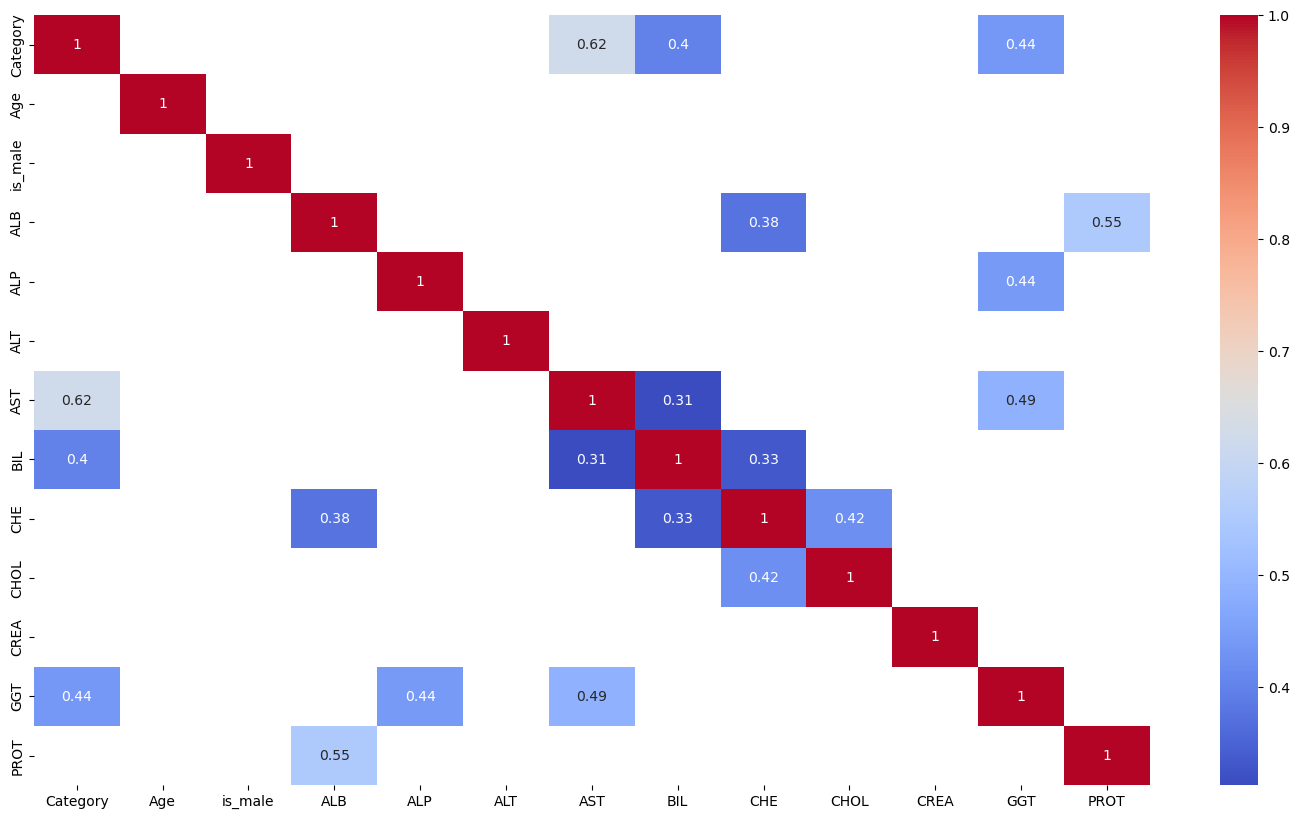

In [21]:
corr = abs(df.corr())
fig, ax = plt.subplots(figsize=(18, 10))
# Showing correlations > 0.3
sns.heatmap(corr[corr >= 0.3], annot=True, cmap='coolwarm')
plt.show()

If we're looking at the row/column of `Category`, we can see there are several columns with value more than `0.3` (this value indicates a barely-viable to strong correlation):
* `AST` - Aspartate Transaminase with value of `0.62`,
* `BIL` - Bilirubin with value of `0.4`, and
* `GGT` - Gamma-Glutamyl Transferase with value of `0.44`.

### `agg('mean')`: Mean Difference Grouped by `Category`

In [22]:
print('Mean values of each column:')
df_mean = df.groupby('Category').agg({
    'Age': 'mean', 'is_male': 'mean', 
    'ALB': 'mean', 'ALT': 'mean', 'AST': 'mean', 
    'BIL': 'mean', 'CHE': 'mean', 'CHOL': 'mean', 
    'CREA': 'mean', 'GGT': 'mean', 'PROT': 'mean',
}).reset_index()
df_mean

Mean values of each column:


,Category,Age,is_male,ALB,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,47.266667,0.600000,42.007037,27.610000,27.125370,8.477778,8.386185,5.479161,78.753704,30.624444,71.875370
1,1,48.426667,0.706667,38.834936,34.504678,89.945333,32.413333,6.831867,4.568457,99.533333,103.676000,73.259255


If we're putting the `corr()` information here, we can look at the relatively huge differences at mean for the three features, with:

* `AST = [27.610,  89.945]`,
* `BIL = [ 8.478,  32.413]`, and
* `GGT = [30.624, 103.676]`.

Out of all the columns, these three do have the biggest range.

## Splitting the Data and Building The Model

Now we've cleaned the data, we can split the data and build the model. We have 615 rows, using `70:30` for `training:test` set would seem balanced.

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(['Category'], axis=1)
y = df['Category']

(X_train, X_test, 
 y_train, y_test) = train_test_split(X, y,
                        test_size=0.3, random_state=100)

## Check for ratio in each sets
print(f'Training set labels: {y_train.value_counts()}')
print(f'Test set labels: {y_test.value_counts()}')

Training set labels: Category
0    382
1     48
Name: count, dtype: int64
Test set labels: Category
0    158
1     27
Name: count, dtype: int64


### `SMOTE`: Synthetic Minority Oversampling Technique 

Remember the imbalanced data? After changing all the non-`0` label to `1`, we still have less-balanced representation of dataset.  Other ways to deal with this is what is called [`SMOTE`](https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c#:~:text=SMOTE%20is%20a%20technique%20to,minority%20class\)%20in%20feature%20space.) (Synthetic Minority Oversampling Technique). In short, this algorithm will:
* Pick a sample and its `N` nearest neighbors, 
* Substract both to get difference, 
* multiply the values by a random number between `0` and `1`, 
* and then add it as a new data in-between current samples.

In [24]:
# On Jupyter Notebook, when `imblearn` can't be ran,
# uncomment the code below and restart Anaconda Navigator.

# !pip uninstall scikit-learn --yes
# !pip uninstall imblearn --yes
# !pip install scikit-learn==1.2.2
# !pip install imblearn

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 16)
x_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [26]:
class_dist_before = y_train.value_counts()
class_dist_after = y_resampled.value_counts()

print(f'Labels Before SMOTE: {class_dist_before}')
print(f'Labels After SMOTE: {class_dist_after}')

Labels Before SMOTE: Category
0    382
1     48
Name: count, dtype: int64
Labels After SMOTE: Category
0    382
1    382
Name: count, dtype: int64


As we can see the sample goes from `382:48` to `382:382`, a ratio of `1:1` filled by SMOTE--a balanced ratio for the input of the model.

Now we can proceed into model. In this section we'll experiment with several algorithms of machine learning to look for one with the best performance.

## Building the Models!



In this project, we're going to use popular models referred from [*"Top 10 Algorithms for Binary Classifications"*](https://towardsdatascience.com/top-10-binary-classification-algorithms-a-beginners-guide-feeacbd7a3e2), an article by Alex Ortner, 2020 in Towards Data Science. The models we'll be testing include:

| No | Algorithms  | Modules       |
|----|-------------|---------------|
| 1  | [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html): [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.GaussianNB) | `sklearn.naive_bayes.GaussianNB()` |
| 2  | [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) | `sklearn.linear_model.LogisticRegression()` `sklearn.linear_model.SGDClassifier()` | 
| 3  | [K-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) | `sklearn.neighbors.KNeighborsClassifier()` |
| 4  | [Support Vector Machine](https://scikit-learn.org/stable/modules/svm.html): [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) | `sklearn.svm.LinearSVC()` |
| 5  | [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) | `sklearn.tree.DecisionTreeClassifier()` |
| 6  | [Bagging Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) | `5` + `sklearn.ensemble.BaggingClassifier()` |
| 7  | ([AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)) and ([Gradien-Boost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)) Decision Tree | `5` + `sklearn.ensemble.AdaBoostClassifier()` `sklearn.ensemble.GradientBoostingClassifier()`|
| 8  | [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) | `sklearn.ensemble.RandomForestClassifier()` |
| 9  | [Voting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) (later) | `sklearn.ensemble.VotingClassifier()` |

In [27]:
# Import relevant modules for experimenting machine learning models

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier,
    RandomForestClassifier, VotingClassifier)

# We'll get to deep learning later on.
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [28]:
random_state = 100

classifiers = []

## Adding the classifiers to a list for easy iteration
classifiers.append(GaussianNB())

classifiers.append(LogisticRegression(
                    random_state=random_state))

classifiers.append(SGDClassifier(
                    random_state=random_state))

classifiers.append(KNeighborsClassifier())

classifiers.append(SVC(random_state=random_state))

classifiers.append(DecisionTreeClassifier(
                    random_state=random_state))

classifiers.append(BaggingClassifier(
    DecisionTreeClassifier(random_state=random_state),
    random_state=random_state))

classifiers.append(AdaBoostClassifier(
    DecisionTreeClassifier(random_state=random_state),
    random_state=random_state))

classifiers.append(GradientBoostingClassifier(
                    random_state=random_state))

classifiers.append(RandomForestClassifier(
                    random_state=random_state))

In [29]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# We're calling StratifiedKFold to make a stratified sample; where ratio for 
# each test set for cross-validation is the same for all iterations.
k_fold = StratifiedKFold(n_splits=10)

cv_results = []

for classifier in classifiers:
    cv_results.append(cross_val_score(
        classifier, x_resampled, y = y_resampled,
        scoring = 'accuracy', cv = k_fold, n_jobs=-1))
    
cv_means = []
cv_stds  = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_stds.append(cv_result.std())

In [30]:
cv_df = pd.DataFrame({
            'cross_val_means': cv_means,
            'cross_val_stds' : cv_stds,
            'algorithm' : [
                'Naive Bayes: Gaussian', 'Logistic Regression',
                'Stochastic Gradient Descent', 'K-Nearest Neighbors', 
                'Support Vector Machine', 'Decision Tree', 'Bagging Decision Tree',
                'AdaBoost Decision Tree', 'Gradient-Boosting Decision Tree', 'Random Forest'          
                ]
        })

In [31]:
cv_df

,cross_val_means,cross_val_stds,algorithm
0,0.819344,0.032981,Naive Bayes: Gaussian
1,0.955451,0.019722,Logistic Regression
2,0.888841,0.055055,Stochastic Gradient Descent
3,0.971224,0.024556,K-Nearest Neighbors
4,0.948923,0.023079,Support Vector Machine
5,0.965943,0.015768,Decision Tree
6,0.967242,0.014743,Bagging Decision Tree
7,0.965977,0.014586,AdaBoost Decision Tree
8,0.977717,0.017696,Gradient-Boosting Decision Tree
9,0.985595,0.009172,Random Forest


To recap the things we've done here:

* We're calling 10 models of machine learning (not including deep learning),
* Each model will train its algorithm through the datasets by:
    * fragmenting first (1/10)-th of the data for test set and using the rest for training; this process is called `cross-validation`,
    * doing it again with second (1/10)-th fragment until `cv=10` times,
    * counting the average score `cv_means` and average error `cv_stds`,
    * and making it into a table; a `DataFrame`.

The question comes next, *"Which ones are we going to take?"* In this case, we'll do the highest accuracy first while considering the smallest error possible, and with a little bit of domain knowledge.

We may notice that **Decision Trees** models are holding the ranks for the smallest error and high accuracy, but we'll just take one of them since these models are all in the same area of decision tree. 

There is **Support Vector Machine** with accuracy not as good as other algorithms, but seeing SVM are used a lot in handling both classification and regresion on linear and non-linear data, we'll take it for optimization.

Also **Voting Classifier** are including several models at once, while we need one for better performance both in accuracy and time. We'll be using this later on after finding the optimized models.

We decide to take 4 top models to optimize:

* **Random Forest**
* **Gradient-Boosting Decision Tree**
* **Support Vector Machine**
* **Logistic Regression**


## Hyperparameter Tuning

We'll be optimizing these 4 models according to its parameters. If you notice when we're calling each classifier, they have `()` at the end; `RandomForestClassifier()`, or `LogisticRegression()`, for instance. These `()` are filled with arguments to customize your models. 

A useful way to tweak them is to optimize the performance. To customize a classifier, we need to look for each models' documentation (all links provided in section `Building the Models!`

One way to find the best parameters without spending much time experimenting is by doing `GridSearchCV`, where the algorithm do ***cross-validation*** for each list in our hyperparameters to find the most optimal combination. It will take quite amount of our computational power, but it'll leave us with the best combination possible.

To get a better picture, let's learn by doing on the first model:

### Random Forest

In [32]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [33]:
random_forest = RandomForestClassifier(
                    random_state=random_state)

random_forest_params = {
    'n_estimators' : [100, 200],
    'criterion' : ['gini'],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 3, 10],
    'min_samples_leaf'  : [3, 6, 10],
    'max_features' : [1, 3, 5, 10],
    'bootstrap' : [False]
}

random_forest_grid = GridSearchCV(
    random_forest, param_grid = random_forest_params,
    cv = k_fold, scoring = 'f1', n_jobs = -1, verbose = 1)

In [34]:
random_forest_grid.fit(x_resampled, y_resampled)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=100), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None, 10, 20],
                         'max_features': [1, 3, 5, 10],
                         'min_samples_leaf': [3, 6, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [35]:
random_forest_gbest = random_forest_grid.best_estimator_
random_forest_gbest

RandomForestClassifier(bootstrap=False, max_features=3, min_samples_leaf=6,
                       random_state=100)

In [36]:
random_forest_grid.best_score_

0.9883094799936905

In [37]:
rfc_best_params = random_forest_grid.best_params_
print(([f'{key}: {value}' for key, value in rfc_best_params.items()]))

['bootstrap: False', 'criterion: gini', 'max_depth: None', 'max_features: 3', 'min_samples_leaf: 6', 'min_samples_split: 2', 'n_estimators: 100']


In [38]:
random_forest_opt = RandomForestClassifier(**rfc_best_params)
random_forest_opt.fit(x_resampled, y_resampled)

RandomForestClassifier(bootstrap=False, max_features=3, min_samples_leaf=6)

To recap, here's what we have done:
* We have made `random_forest_params` filled with parameter values we'd like to try into `GridSearchCV`
* We call `GridSearchCV` to find the best combinations out of our parameters,
* We print the best combinations of parameters and its `F1` score (In short, this score is more accurate in telling model's performance)
* And we make an optimized version of the classifier.

At `RandomForest` we have found best parameters in `rfc_best_params` with an `F1` score of `98.8309%`. This means that both variables within `F1`: `accuracy` and `recall` implies a good performance in detecting Hepatitis C patients; both for positive label (`accuracy`) and negative label (`recall`).

We'll do the same procedure for the rest of chosen models.

### Gradient-Boosting Decision Tree

In [39]:
gradient_boosting = GradientBoostingClassifier(
                        random_state=random_state)

grad_params = {
    'loss'              : ['log_loss'],
    'learning_rate'     : [0.1, 0.01, 0.005],
    'n_estimators'      : [100, 200],
    'min_samples_split' : [2, 3, 10],
    'min_samples_leaf'  : [3, 6, 10],
    'max_depth'         : [None, 10, 20],
    'max_features'      : [1, 3, 5, 10],
}

gradient_boosting_grid = GridSearchCV(
    gradient_boosting, param_grid = grad_params,
    cv = k_fold, scoring = 'f1', n_jobs = -1, verbose = 1)

In [40]:
gradient_boosting_grid.fit(x_resampled, y_resampled)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=100), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.005],
                         'loss': ['log_loss'], 'max_depth': [None, 10, 20],
                         'max_features': [1, 3, 5, 10],
                         'min_samples_leaf': [3, 6, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [41]:
gradient_boosting_gbest = gradient_boosting_grid.best_estimator_
gradient_boosting_gbest

GradientBoostingClassifier(max_depth=20, max_features=3, min_samples_leaf=10,
                           n_estimators=200, random_state=100)

In [42]:
print(gradient_boosting_grid.best_score_)

gbc_best_params = gradient_boosting_grid.best_params_
print(([f'{key}: {value}' for key, value in gbc_best_params.items()]))

0.9909406374216501
['learning_rate: 0.1', 'loss: log_loss', 'max_depth: 20', 'max_features: 3', 'min_samples_leaf: 10', 'min_samples_split: 2', 'n_estimators: 200']


In [43]:
gradient_boosting_opt = GradientBoostingClassifier(**gbc_best_params)
gradient_boosting_opt.fit(x_resampled, y_resampled)

GradientBoostingClassifier(max_depth=20, max_features=3, min_samples_leaf=10,
                           n_estimators=200)

### Support Vector Machine (SVM)

In [44]:
svc = SVC(probability = True, random_state=random_state)

svc_params = {
    'kernel' : ['rbf'],
    'gamma' : [0.001, 0.01, 0.1, 1],
    'C': [1, 10, 50, 100, 200, 300, 1000]
}

svc_grid = GridSearchCV(svc, param_grid = svc_params,
               cv = k_fold, scoring = 'f1', n_jobs = -1, verbose = 1)

In [45]:
svc_grid.fit(x_resampled, y_resampled)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(probability=True, random_state=100), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             scoring='f1', verbose=1)

In [46]:
svc_gbest = svc_grid.best_estimator_
svc_gbest

SVC(C=50, gamma=0.001, probability=True, random_state=100)

In [47]:
print(svc_grid.best_score_)

svc_best_params = svc_grid.best_params_
print(([f'{key}: {value}' for key, value in svc_best_params.items()]))

0.9800353654784034
['C: 50', 'gamma: 0.001', 'kernel: rbf']


In [48]:
svc_opt = SVC(probability = True, **svc_best_params)
svc_opt.fit(x_resampled, y_resampled)

SVC(C=50, gamma=0.001, probability=True)

### Logistic Regression

In [49]:
logistic_regression = LogisticRegression(max_iter=1000,
                        random_state=random_state)

log_reg_params = {
    'penalty': ['l2', None],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

logistic_regression_grid = GridSearchCV(
    logistic_regression, param_grid = log_reg_params,
    cv = k_fold, scoring = 'f1', n_jobs = -1, verbose = 1)

In [50]:
logistic_regression_grid.fit(x_resampled, y_resampled)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000, random_state=100),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2', None]},
             scoring='f1', verbose=1)

In [51]:
logistic_regression_gbest = logistic_regression_grid.best_estimator_
logistic_regression_gbest

LogisticRegression(C=0.1, max_iter=1000, random_state=100)

In [52]:
print(logistic_regression_grid.best_score_)

log_reg_best_params = logistic_regression_grid.best_params_
print(([f'{key}: {value}' for key, value in log_reg_best_params.items()]))

0.9538228988124444
['C: 0.1', 'penalty: l2']


In [53]:
logistic_regression_opt = LogisticRegression(max_iter=1000, **log_reg_best_params)
logistic_regression_opt.fit(x_resampled, y_resampled)

LogisticRegression(C=0.1, max_iter=1000)

## Plotting the Learning Curve

Before testing the model, let's look at how each model progresses in their cross-validation. We'll be plotting learning curves for this by utilizing a module of [`sklearn.model_selection.learning_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)

In [54]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, 
                       n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 6)):
    
    """Showing a progress of each cross-validation in a model"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy Score (%)')
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    
    plt.grid()
    
    # Define lower and higher end of both plots to look for error ranges
    train_lower_end  = train_scores_mean - train_scores_std
    train_higher_end = train_scores_mean + train_scores_std
    test_lower_end   = test_scores_mean - test_scores_std
    test_higher_end  = test_scores_mean + test_scores_std
    
    plt.fill_between(train_sizes, train_lower_end, train_higher_end, alpha=0.15, color='r')
    plt.fill_between(train_sizes,  test_lower_end,  test_higher_end, alpha=0.15, color='g')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Cross-validation: Training score')
    plt.plot(train_sizes,  test_scores_mean, 'o-', color='g', label='Cross-validation: Test score')
    
    plt.legend(loc='lower right')
    return plt

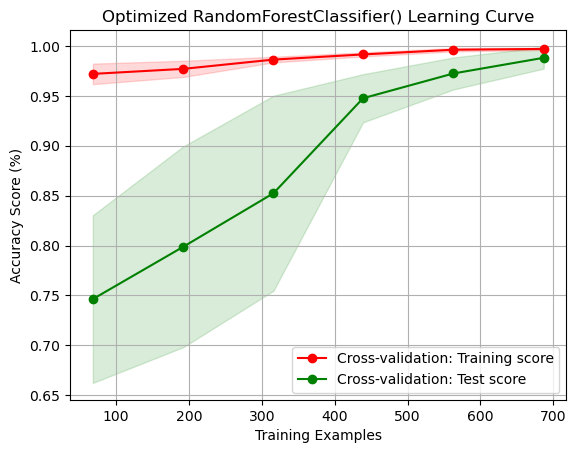

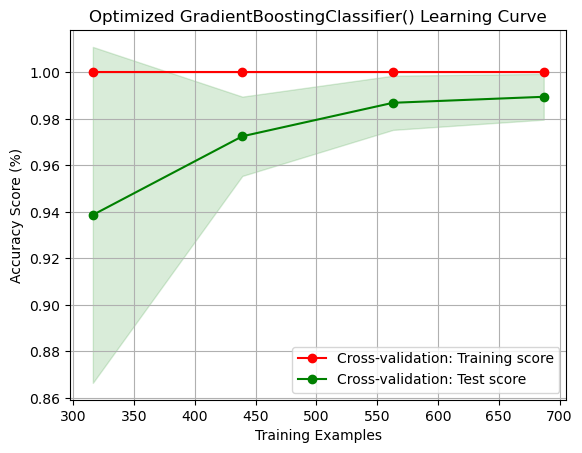

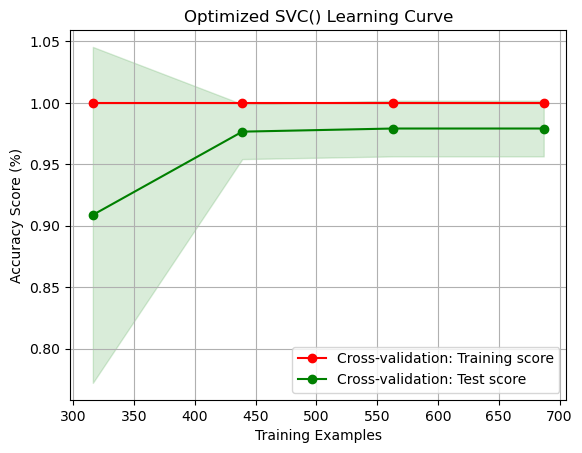

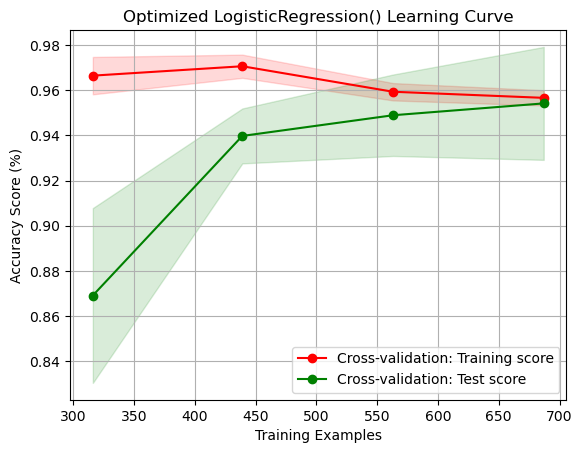

In [55]:
rfc_plot = plot_learning_curve(
                random_forest_gbest, 'Optimized RandomForestClassifier() Learning Curve',
                x_resampled, y_resampled, cv=k_fold)

gbc_plot = plot_learning_curve(
                gradient_boosting_gbest, 'Optimized GradientBoostingClassifier() Learning Curve',
                x_resampled, y_resampled, cv=k_fold)

svc_plot = plot_learning_curve(
                svc_gbest, 'Optimized SVC() Learning Curve',
                x_resampled, y_resampled, cv=k_fold)

lr_plot  = plot_learning_curve(
                logistic_regression_gbest, 'Optimized LogisticRegression() Learning Curve',
                x_resampled, y_resampled, cv=k_fold)

## Voting Classifier

We've chosen and optimized out models, now let's look at another option: `VotingClassifier()`. In short, this classifier: 
* Gather all of our four optimized models, each one to predict the label,
* Each model votes based from their prediction,
* and the most votes are referred as *the* label on this classifier.

When we feel like the accuracies are lower in test area, we can utilize `VotingClassifier` for hopefully a better model utilizing all optimized models.

In [56]:
voting_classifier = VotingClassifier(
    estimators=[('rfc', random_forest_gbest),
                ('gbc', gradient_boosting_gbest),
                ('svc', svc_gbest),
                ('lr', logistic_regression_gbest)], 
    voting='soft', n_jobs=-1)

vote = voting_classifier.fit(x_resampled, y_resampled)
print(vote)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(bootstrap=False,
                                                     max_features=3,
                                                     min_samples_leaf=6,
                                                     random_state=100)),
                             ('gbc',
                              GradientBoostingClassifier(max_depth=20,
                                                         max_features=3,
                                                         min_samples_leaf=10,
                                                         n_estimators=200,
                                                         random_state=100)),
                             ('svc',
                              SVC(C=50, gamma=0.001, probability=True,
                                  random_state=100)),
                             ('lr',
                              LogisticRegression(C=0.1, max_iter=1000

## Defining the Best Model

Now se've found the `F1` scores for each optimized model, we'll be using them to our test data and look for the best one.

In [57]:
from sklearn import metrics
                    
models = [('RandomForest() :', random_forest_opt),
          ('GradientBoosting() :', gradient_boosting_opt),
          ('SVC() :', svc_opt),
          ('LogisticRegression() :', logistic_regression_opt),
          ('VotingClassifier() :', vote)]

for name, model in models:
    
    print(name)
    
    y_pred = model.predict(X_test)
    
    f1_score  = metrics.f1_score(y_test, y_pred)
    accuracy  = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall    = metrics.recall_score(y_test, y_pred)
    
    print(f'Test set - Accuracy: {accuracy*100:.4f}%')
    print(f'Test set - Precision: {precision*100:.4f}%')
    print(f'Test set - Recall: {recall*100:.4f}%')
    print(f'Test set - F1 Score: {f1_score*100:.4f}%')

RandomForest() :
Test set - Accuracy: 94.5946%
Test set - Precision: 77.4194%
Test set - Recall: 88.8889%
Test set - F1 Score: 82.7586%
GradientBoosting() :
Test set - Accuracy: 97.2973%
Test set - Precision: 95.8333%
Test set - Recall: 85.1852%
Test set - F1 Score: 90.1961%
SVC() :
Test set - Accuracy: 90.8108%
Test set - Precision: 63.8889%
Test set - Recall: 85.1852%
Test set - F1 Score: 73.0159%
LogisticRegression() :
Test set - Accuracy: 93.5135%
Test set - Precision: 71.4286%
Test set - Recall: 92.5926%
Test set - F1 Score: 80.6452%
VotingClassifier() :
Test set - Accuracy: 95.6757%
Test set - Precision: 82.7586%
Test set - Recall: 88.8889%
Test set - F1 Score: 85.7143%


Looking at scores of `Accuracy` and `F1 Score`, we can conclude that `GradientBoosting()` has the highest performance in predicting patients with Hepatitis C.

# Conclusion

In this project, we've predicted patients of hepatitis C from its blood work dataset using models of machine learning. Given that the data of hepatitis C in each category are way less than healthy ones, we've decided to agglomerate all hepatitis category into one, and also utilize Synthetic Minority Over-sampling Technique (SMOTE) to mitigate data imbalance.

After experimenting with a number of models, we've got a result of `GradientBoosting()` being the best model for prediction with `Accuracy` of `97.2973%` and `F1-Score` of `90.1961%`